In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [21]:
train_data = pd.read_csv('LTV.csv')
train_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [44]:
t = pd.read_csv('LTV.csv')
t['Customer'].nunique()

9134

In [22]:
train_data.drop(['Customer','Effective To Date'], axis = 1, inplace=True)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

## Выделим численные признаки от остальных

In [19]:
train_data.dtypes.to_dict()

{'State': dtype('O'),
 'Customer Lifetime Value': dtype('float64'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [25]:
num_cols = []
str_cols = []

cols_and_type = train_data.dtypes.to_dict()

for col, types in cols_and_type.items():
    if types in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [26]:
str_cols

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [27]:
train_data[num_cols].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [28]:
train_data[str_cols].describe()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


## Построим графики, посмотрим на распределение признаков

<AxesSubplot:title={'center':'Распределение целевой переменной'}, xlabel='Customer Lifetime Value', ylabel='Density'>

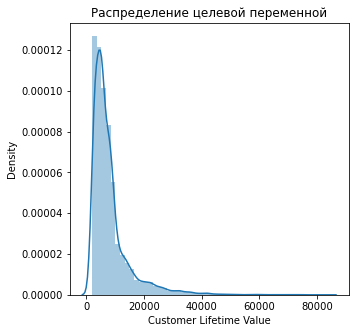

In [87]:
plt.figure(figsize = (5, 5))
plt.title('Распределение целевой переменной')
sns.distplot(train_data['Customer Lifetime Value'])

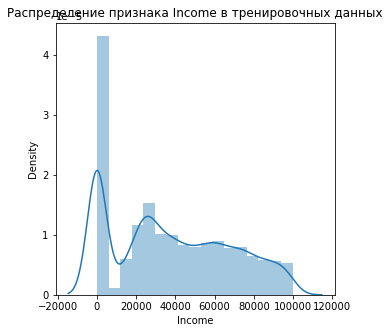

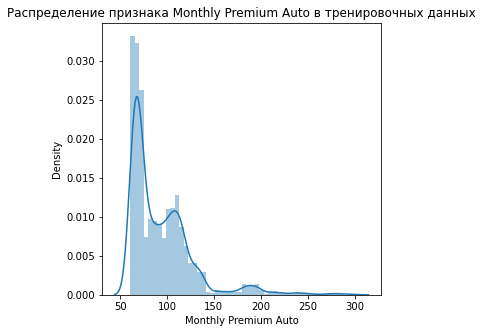

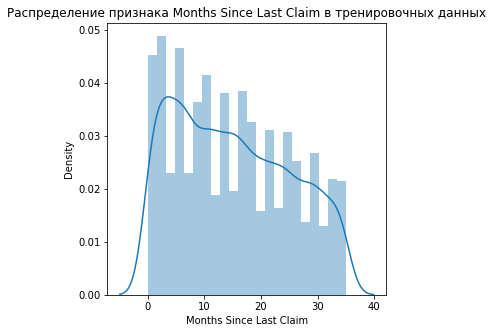

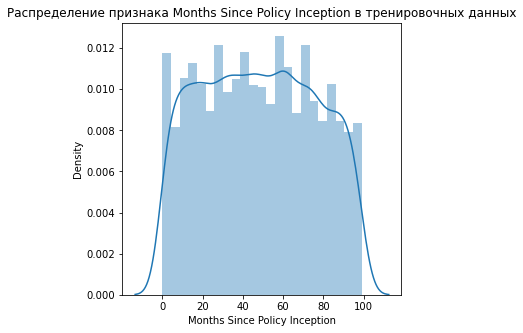

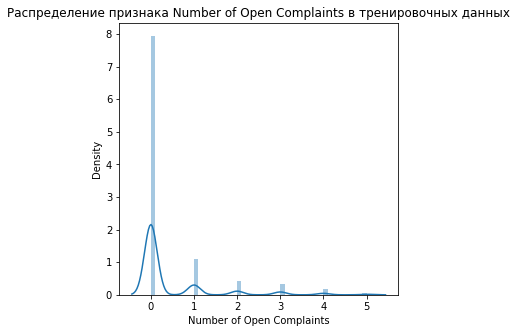

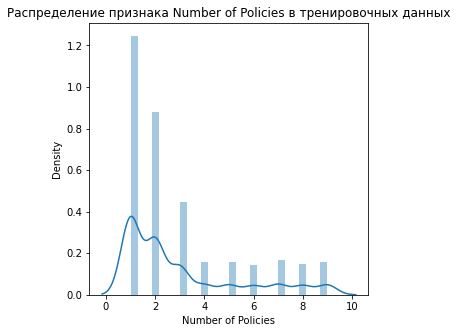

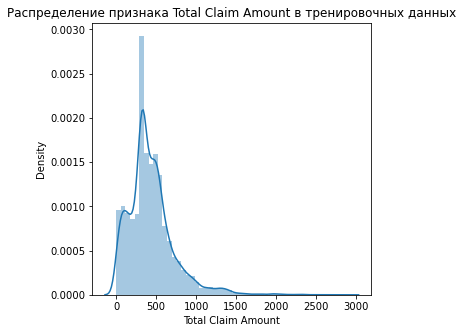

In [36]:
for col in num_cols:
    if col!='Customer Lifetime Value':
        plt.figure(figsize = (5, 5))
        plt.title(f'Распределение признака {col} в тренировочных данных')
        sns.distplot(train_data[col])

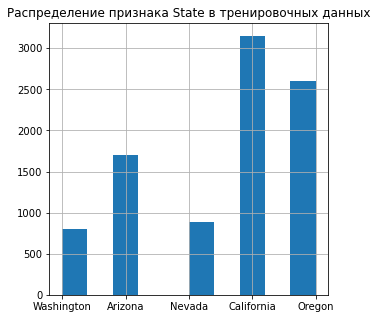

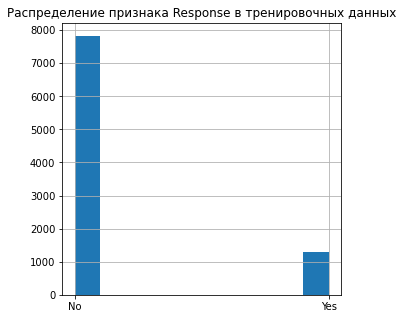

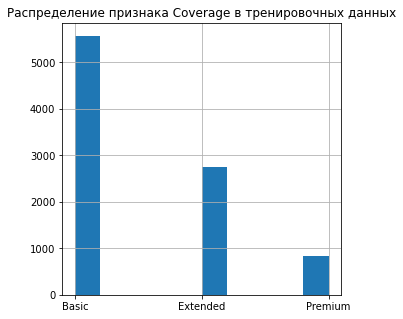

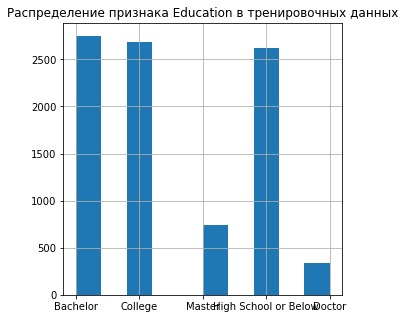

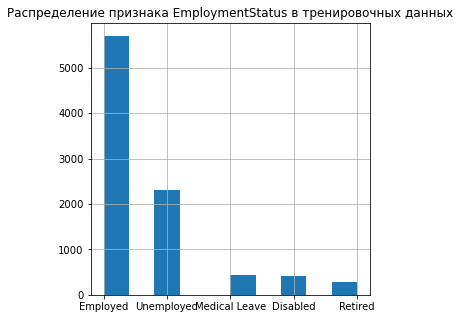

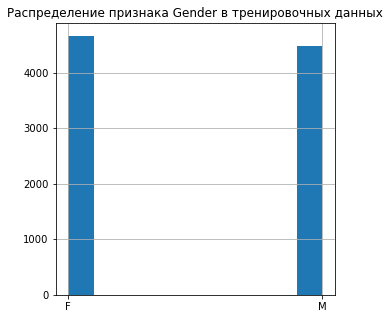

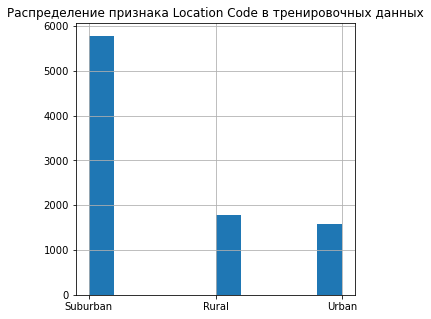

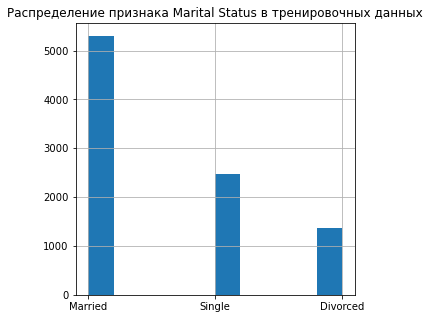

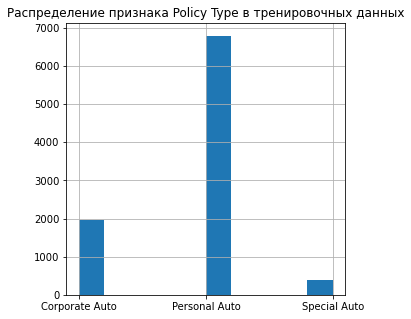

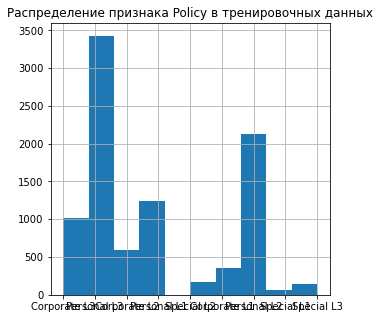

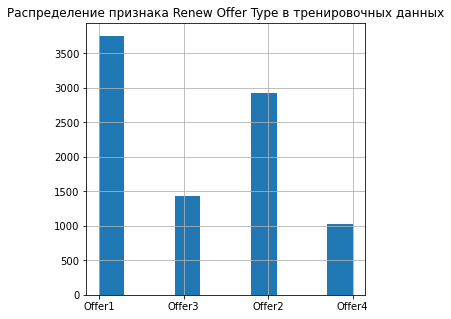

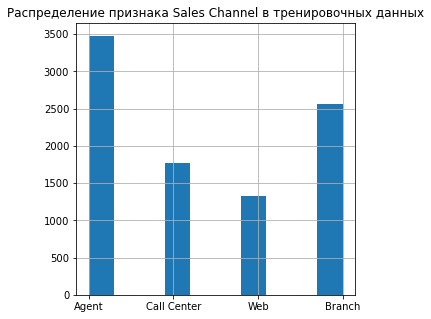

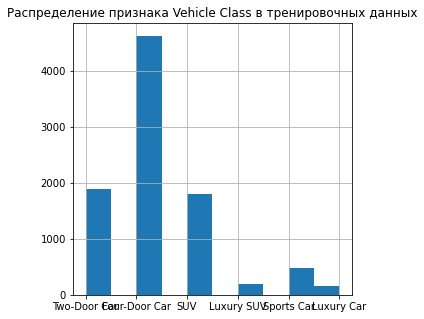

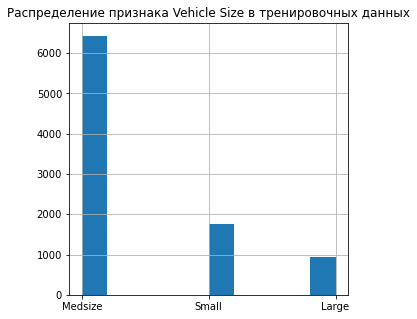

In [34]:
for col in str_cols:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in str_cols:
    train_data[col] = le.fit_transform(train_data[col])    

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)

## Корреляция признаков

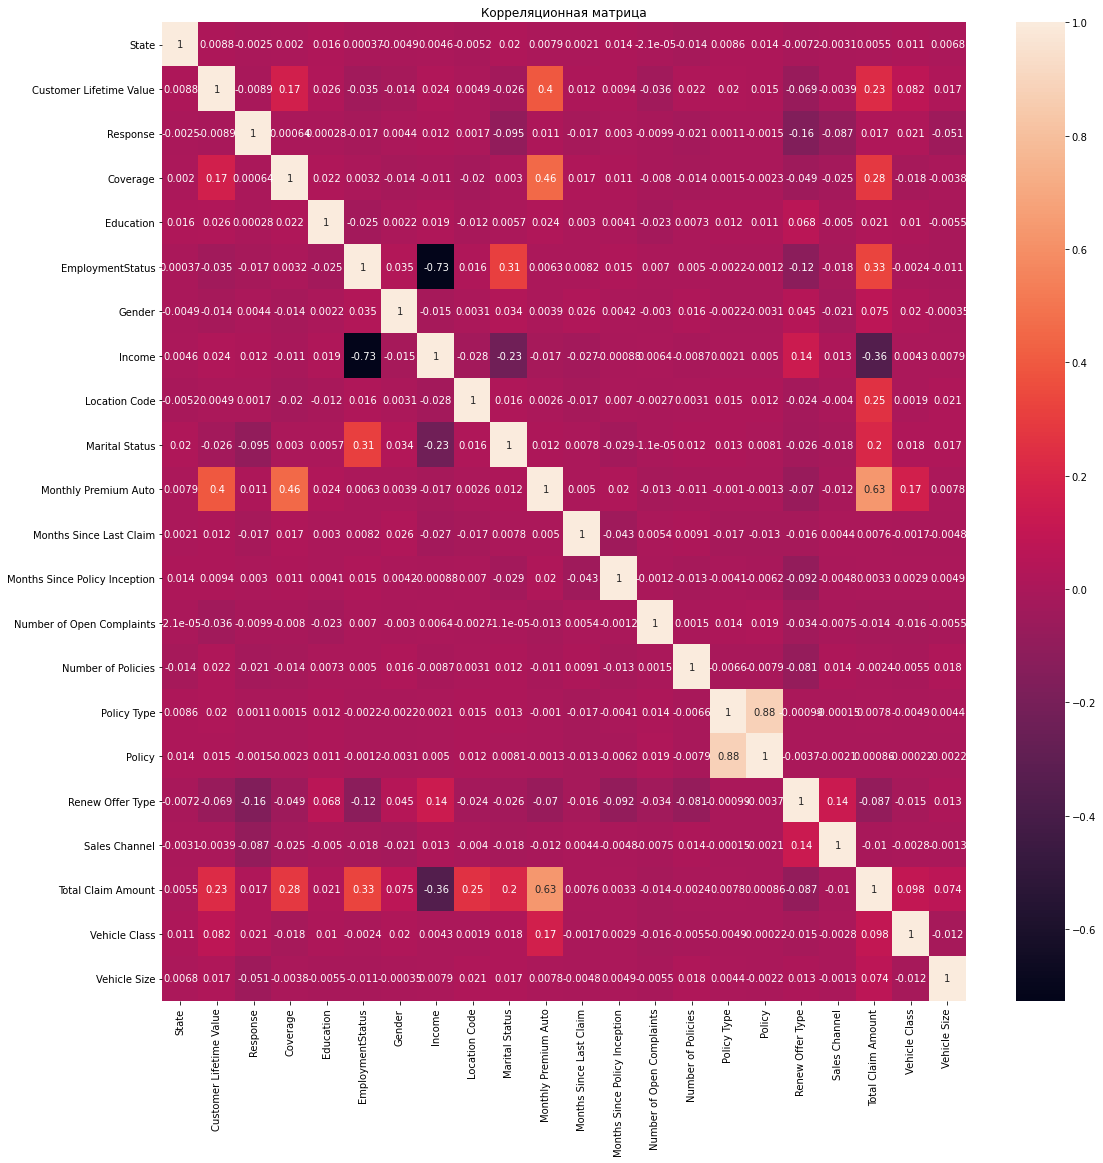

In [46]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(train_data_sc, columns = train_data.columns)
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()

# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

## Обучение различных моделей


In [47]:
X = train_data_trasformed.drop('Customer Lifetime Value', axis = 1)
y = train_data_trasformed['Customer Lifetime Value']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
lr_r2 = r2_score(y_test, preds)
lr_r2

0.15537820083795106

In [86]:
# Кросс-валидация
from sklearn.model_selection import cross_validate

cv = cross_validate(lr, X, y, cv = 5, scoring = 'r2')
print(cv['test_score'])
print("Результаты линейной регрессии:", cv['test_score'].mean())

[0.13424814 0.16620668 0.19524319 0.16073447 0.13103115]
Результаты линейной регрессии: 0.15749272625455255


In [59]:
# Решающее дерево
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state = 42)
cv_dec_tree = cross_validate(dec_tree, X, y, cv = 5, scoring = 'r2')

print("Результаты решающего дерева:", cv_dec_tree['test_score'].mean())

Результаты решающего дерева: 0.40232731624771273


In [62]:
# Случайный лес
from sklearn.ensemble import RandomForestRegressor

ran_for = RandomForestRegressor(random_state = 42)

cv_ran_for = cross_validate(ran_for, X, y, cv = 5, scoring = 'r2')

print("Результаты случайного леса:", cv_ran_for['test_score'].mean())

Результаты случайного леса: 0.6998290629453405


Как видно, лучший результат показал случайный лес

## Интерпретация модели и важность признаков

In [73]:
lr.fit(X, y)
print("Коэффициенты в линейной регрессии:", lr.coef_)

Коэффициенты в линейной регрессии: [ 0.00533695 -0.02285934 -0.01754221  0.0187221  -0.02087801 -0.01051803
  0.0096295   0.00912958 -0.02199206  0.41402416  0.00996429 -0.0031725
 -0.03284314  0.02200958  0.03107611 -0.01121578 -0.05110606  0.00366708
 -0.02462519  0.01402709  0.01459845]


In [75]:
a = np.where(lr.coef_==lr.coef_.max())
X.columns[a[0]]

Index(['Monthly Premium Auto'], dtype='object')

In [76]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.01354871 0.00554429 0.00379903 0.01549292 0.00877412 0.00598594
 0.03869667 0.00292296 0.0080727  0.24956577 0.03367612 0.04067649
 0.00560611 0.47029743 0.00252923 0.01352395 0.00958205 0.01463728
 0.04594992 0.00494606 0.00617226]


In [78]:
b = np.where(dec_tree.feature_importances_==dec_tree.feature_importances_.max())
X.columns[b[0]]

Index(['Number of Policies'], dtype='object')

In [80]:
import shap
# Загружаем JS шаблоны для визуализации
shap.initjs()

# Обязателен явный вызов метода fit
ran_for.fit(X, y)

print("Обучили модель, переходим к визуализации")
# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

Обучили модель, переходим к визуализации


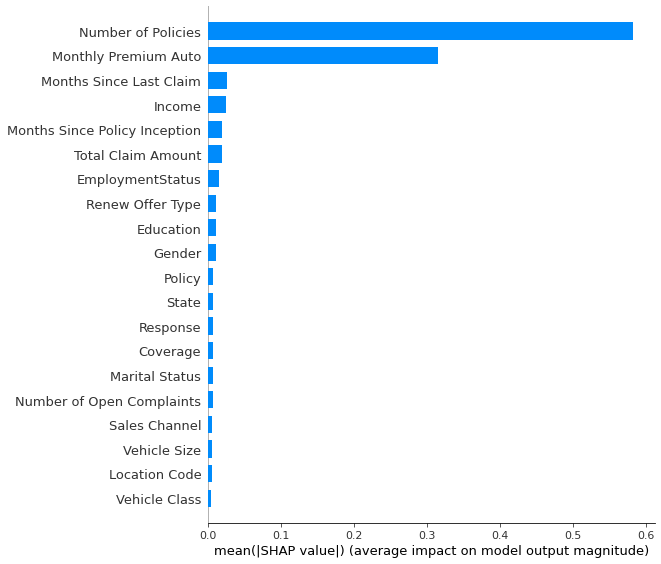

In [81]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")

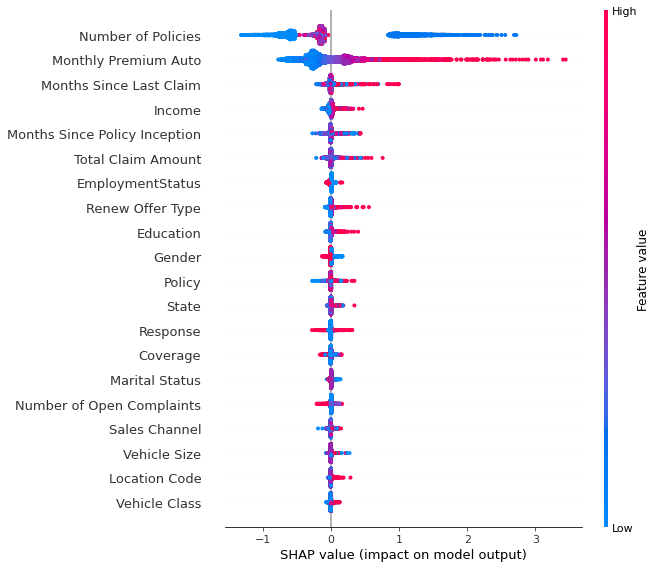

In [83]:
shap.summary_plot(shap_values, X)

In [91]:
#Итого на LTV больше всего влияют уменьшение Number of Policies (хотя на матрице корреляций этого не видно) 
#и увеличение Monthly Premium Auto